## Demographic Data Analyzer

Analyze demographic data using Pandas. Data was extracted from the 1994 Census database.

#### 1. Import Libraries and Load Data

In [1]:
# import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
data = pd.read_csv("adult.data.csv")
# print(data)

#### 2. Data Exploration and Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# check missing data

data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

We don't have any missing values in data.

In [6]:
race = data["race"].value_counts()
print(race)

race_unique = list(data["race"].unique())
print(race_unique)

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']


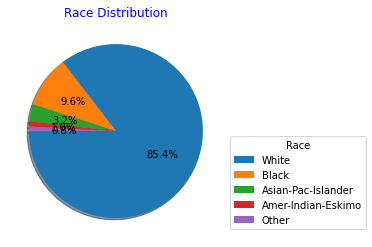

In [7]:
plt.pie(race, radius = 1, labels = None, shadow = bool, autopct='%1.1f%%', labeldistance=1.1, startangle=180)

plt.title("Race Distribution", color = "blue")
#plt.axis('equal')
plt.legend(title="Race", labels = race_unique, loc="upper left", bbox_to_anchor=(1, 0.5))

plt.show()

In [8]:
# create mask for Male

mask = (data["sex"] == "Male")
print(mask)

0         True
1         True
2         True
3         True
4        False
         ...  
32556    False
32557     True
32558    False
32559     True
32560    False
Name: sex, Length: 32561, dtype: bool


In [9]:
# use mask to filter the data and calculate the mean of age

print(f'Mean of Male Age is: {data[mask]["age"].mean()}')

Mean of Male Age is: 39.43354749885268


In [10]:
bachelor = data[data["education"] == "Bachelors"].value_counts()
# print(bachelor)

In [11]:
# calculate percentage of people who have a Bachelor's degree

percentage_bachelor = (len(bachelor) / len(data)) * 100
print(f"Percentage of people with Bachelor's degree: {percentage_bachelor:.2f}")

Percentage of people with Bachelor's degree: 16.44


In [12]:
data["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [13]:
# calculate percentage of people with advanced education (Bachelors, Masters, or Doctorate) who make more than 50K

filter_degree = ((data["education"] == "Bachelors") | (data["education"] == "Masters") | (data["education"] == "Doctorate"))
filter_data = data[filter_degree]
# print(filter_data)

In [14]:
filter_data["education"].unique()

array(['Bachelors', 'Masters', 'Doctorate'], dtype=object)

In [15]:
# check thoes who have high degree and earn more than 50k
more_than_50K = (filter_data["salary"] == ">50K")
# print(filter_data[more_than_50K])

In [16]:
degree = list(filter_data["education"].value_counts())
print(degree)

degree_labels = list(filter_data["education"].unique())
print(degree_labels)


[5355, 1723, 413]
['Bachelors', 'Masters', 'Doctorate']


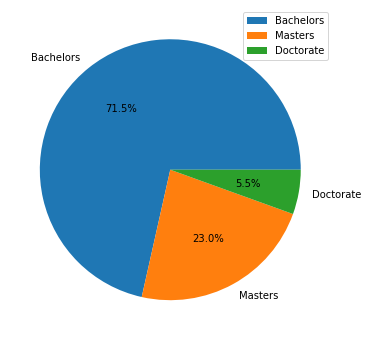

In [17]:
# plot of advanced degrees

plt.figure(figsize = (12, 6))
plt.pie(degree, labels = degree_labels, autopct='%1.1f%%')
plt.legend(loc = "best")
plt.show()

###### Percentage of people without advanced education who make more than 50K.

In [18]:
indices_to_drop = data[data["education"].isin(["Bachelors", "Masters", "Doctorate"])].index
data.drop(indices_to_drop, inplace=True)

In [19]:
data.head(10)
data["education"].unique()

array(['HS-grad', '11th', '9th', 'Some-college', 'Assoc-acdm',
       'Assoc-voc', '7th-8th', 'Prof-school', '5th-6th', '10th',
       '1st-4th', 'Preschool', '12th'], dtype=object)

In [32]:
# people without advanced education make more than 50K
without_degree = (data["salary"] == ">50K")
print(f'There are: {len(data[without_degree])} of people without advance education who make more than 50K.')

There are: 4355 of people without advance education who make more than 50K.


In [27]:
# percentage of people without advanced education make more than 50K

pre_without_degree = (4355/32561)*100
print(f'{pre_without_degree:.2f} of people make more than 50K without advanced education.')

13.37 of people make more than 50K without advanced education


In [30]:
print(f'Minimum number of hours a person works per week is: {data["hours-per-week"].min()} hour.')
print(f'Masimum number of hours a person works per week is: {data["hours-per-week"].max()} hours.')

Minimum number of hours a person works per week is: 1 hour.
Masimum number of hours a person works per week is: 99 hours.


In [23]:
#  people who work the minimum number of hours per week and have a salary of more than 50K
min_hours = (data["hours-per-week"] == 1)
min_min = data[min_hours]
min_min[min_min["salary"] == ">50K"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
20072,65,?,76043,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K
